In [7]:
# This cell installs VESICal. You don't need to run this again - so comment out with a # after running
!pip install VESIcal

  Using cached VESIcal-0.1.7-py3-none-any.whl (87 kB)


In [8]:
# Importing VESIcal and matplotlib (python's plotting thing)
import VESIcal as v
import matplotlib.pyplot as plt

In [9]:
# Load in melt inclusion data
myfile= v.ExcelFile('Cassidy2015_AndesiteMI_YouTubeDemo.xlsx', sheet_name='Sheet1',  input_type='wtpercent')

In [10]:
# Allows you to inspect data, and check VESIcal has read column headings correctly (e.g., non zero values for oxides)
myfile.data

,Label.1,SiO2,TiO2,Al2O3,FeOTotalfromMike,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,H2O,CO2,Temp,Cr2O3,NiO,CoO,P2O5
SSH4_1,Pyx,64.6,0.86,16.4,3.98,0.663327,3.3830,0,0.87,4.53,4.08,1.05,5.06,0.0105,1050,0.0,0.0,0.0,0.0
SSH4_2,Pyx,63.6,0.59,16.5,3.44,0.573328,2.9240,0,0.78,4.24,4.31,0.97,5.08,0.0071,1050,0.0,0.0,0.0,0.0
SSH10_1,Ol,58.7,0.68,15.0,5.57,0.928324,4.7345,0,2.36,5.70,2.13,2.22,5.62,0.0313,1050,0.0,0.0,0.0,0.0
SSH5B_1,Pyx_2,67.6,0.48,17.0,0.48,0.079999,0.4080,0,0.02,3.14,4.51,1.58,6.19,0.0043,1050,0.0,0.0,0.0,0.0
SSH5B_2,Pyx,67.2,0.70,16.9,0.46,0.076666,0.3910,0,0.02,3.31,4.49,1.60,5.48,0.0052,1050,0.0,0.0,0.0,0.0
SSH10,Ol,60.3,0.81,15.8,5.49,0.914991,4.6665,0,2.80,6.56,1.94,0.32,5.20,0.0250,1050,0.0,0.0,0.0,0.0
SSH5B,Pyx,68.0,0.41,16.2,1.40,0.233331,1.1900,0,0.60,4.20,4.20,1.60,5.70,0.0180,1050,0.0,0.0,0.0,0.0
SSH4_3,Pyx,63.0,0.62,16.0,4.20,0.699993,3.5700,0,1.10,4.30,3.30,0.90,5.10,0.0140,1050,0.0,0.0,0.0,0.0


In [11]:
# Calculating saturation pressures using the default model Magmasat
Sat_P_MagmaSat=myfile.calculate_saturation_pressure(temperature=1050)

Calculating sample SSH4_1
Calculating sample SSH4_2
Calculating sample SSH10_1
Calculating sample SSH5B_1
Calculating sample SSH5B_2
Calculating sample SSH10
Calculating sample SSH5B
Calculating sample SSH4_3
Done!


In [12]:
# Inspecting saturation pressures
Sat_P_MagmaSat['SaturationP_bars_VESIcal']

SSH4_1     1760
SSH4_2     1740
SSH10_1    2560
SSH5B_1    2170
SSH5B_2    1850
SSH10      2210
SSH5B      2090
SSH4_3     1930
Name: SaturationP_bars_VESIcal, dtype: int64

In [13]:
# Calculating saturation pressures using the simplification of Dixon 1997 implemented in VolatileCalc
Sat_P_Dixon=myfile.calculate_saturation_pressure(temperature=1050, model='Dixon')

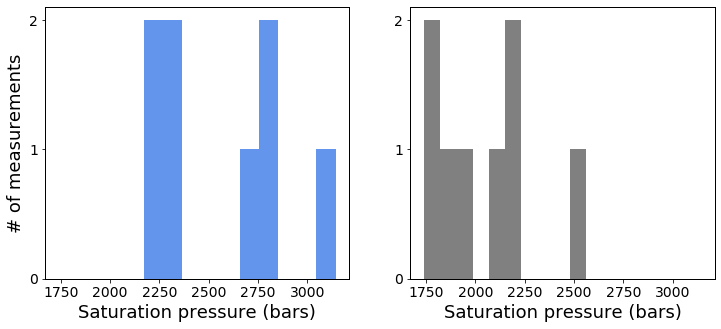

In [15]:
# Plotting as histograms (obviously this is a very small dataset, but that is to allow fast computation in this example!)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5), sharex=True)
ax1.hist(Sat_P_Dixon['SaturationP_bars_VESIcal'], color='cornflowerblue')
ax2.hist(Sat_P_MagmaSat['SaturationP_bars_VESIcal'], color='grey')
ax1.set_xlabel('Saturation pressure (bars)')
ax2.set_xlabel('Saturation pressure (bars)')
ax1.set_ylabel('# of measurements')
ax1.locator_params(axis="both", integer=True, tight=True)
ax2.locator_params(axis="both", integer=True, tight=True)

fig.savefig('Andesitic_MIs_Histogram.svg', transparent=True)

In [18]:
# Save calculations to excel for future reference
myfile.save_excelfile(filename = 'Andesite_MI_SatPs.xlsx', calculations=[Sat_P_MagmaSat, Sat_P_Dixon], sheet_name=['Magmasat', 'Dixon'])

Saved Andesite_MI_SatPs.xlsx
